In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../reports/runs.csv")

In [7]:
df.columns

Index(['Start Time', 'Duration', 'Run ID', 'Name', 'Source Type',
       'Source Name', 'User', 'Status', 'hyperparameter_id', 'learning_rate',
       'max_depth', 'min_samples_leaf', 'n_estimators', 'n_neighbors',
       'CV Test MAE', 'CV Test MSE', 'CV Test R2', 'CV Test RMSE',
       'CV Train MAE', 'CV Train MSE', 'CV Train R2', 'CV Train RMSE',
       'CV Training Time sec', 'example_count', 'max_error',
       'mean_absolute_error', 'mean_absolute_percentage_error',
       'mean_on_target', 'mean_squared_error', 'r2_score',
       'root_mean_squared_error', 'score', 'sum_on_target',
       'training_time_sec'],
      dtype='object')

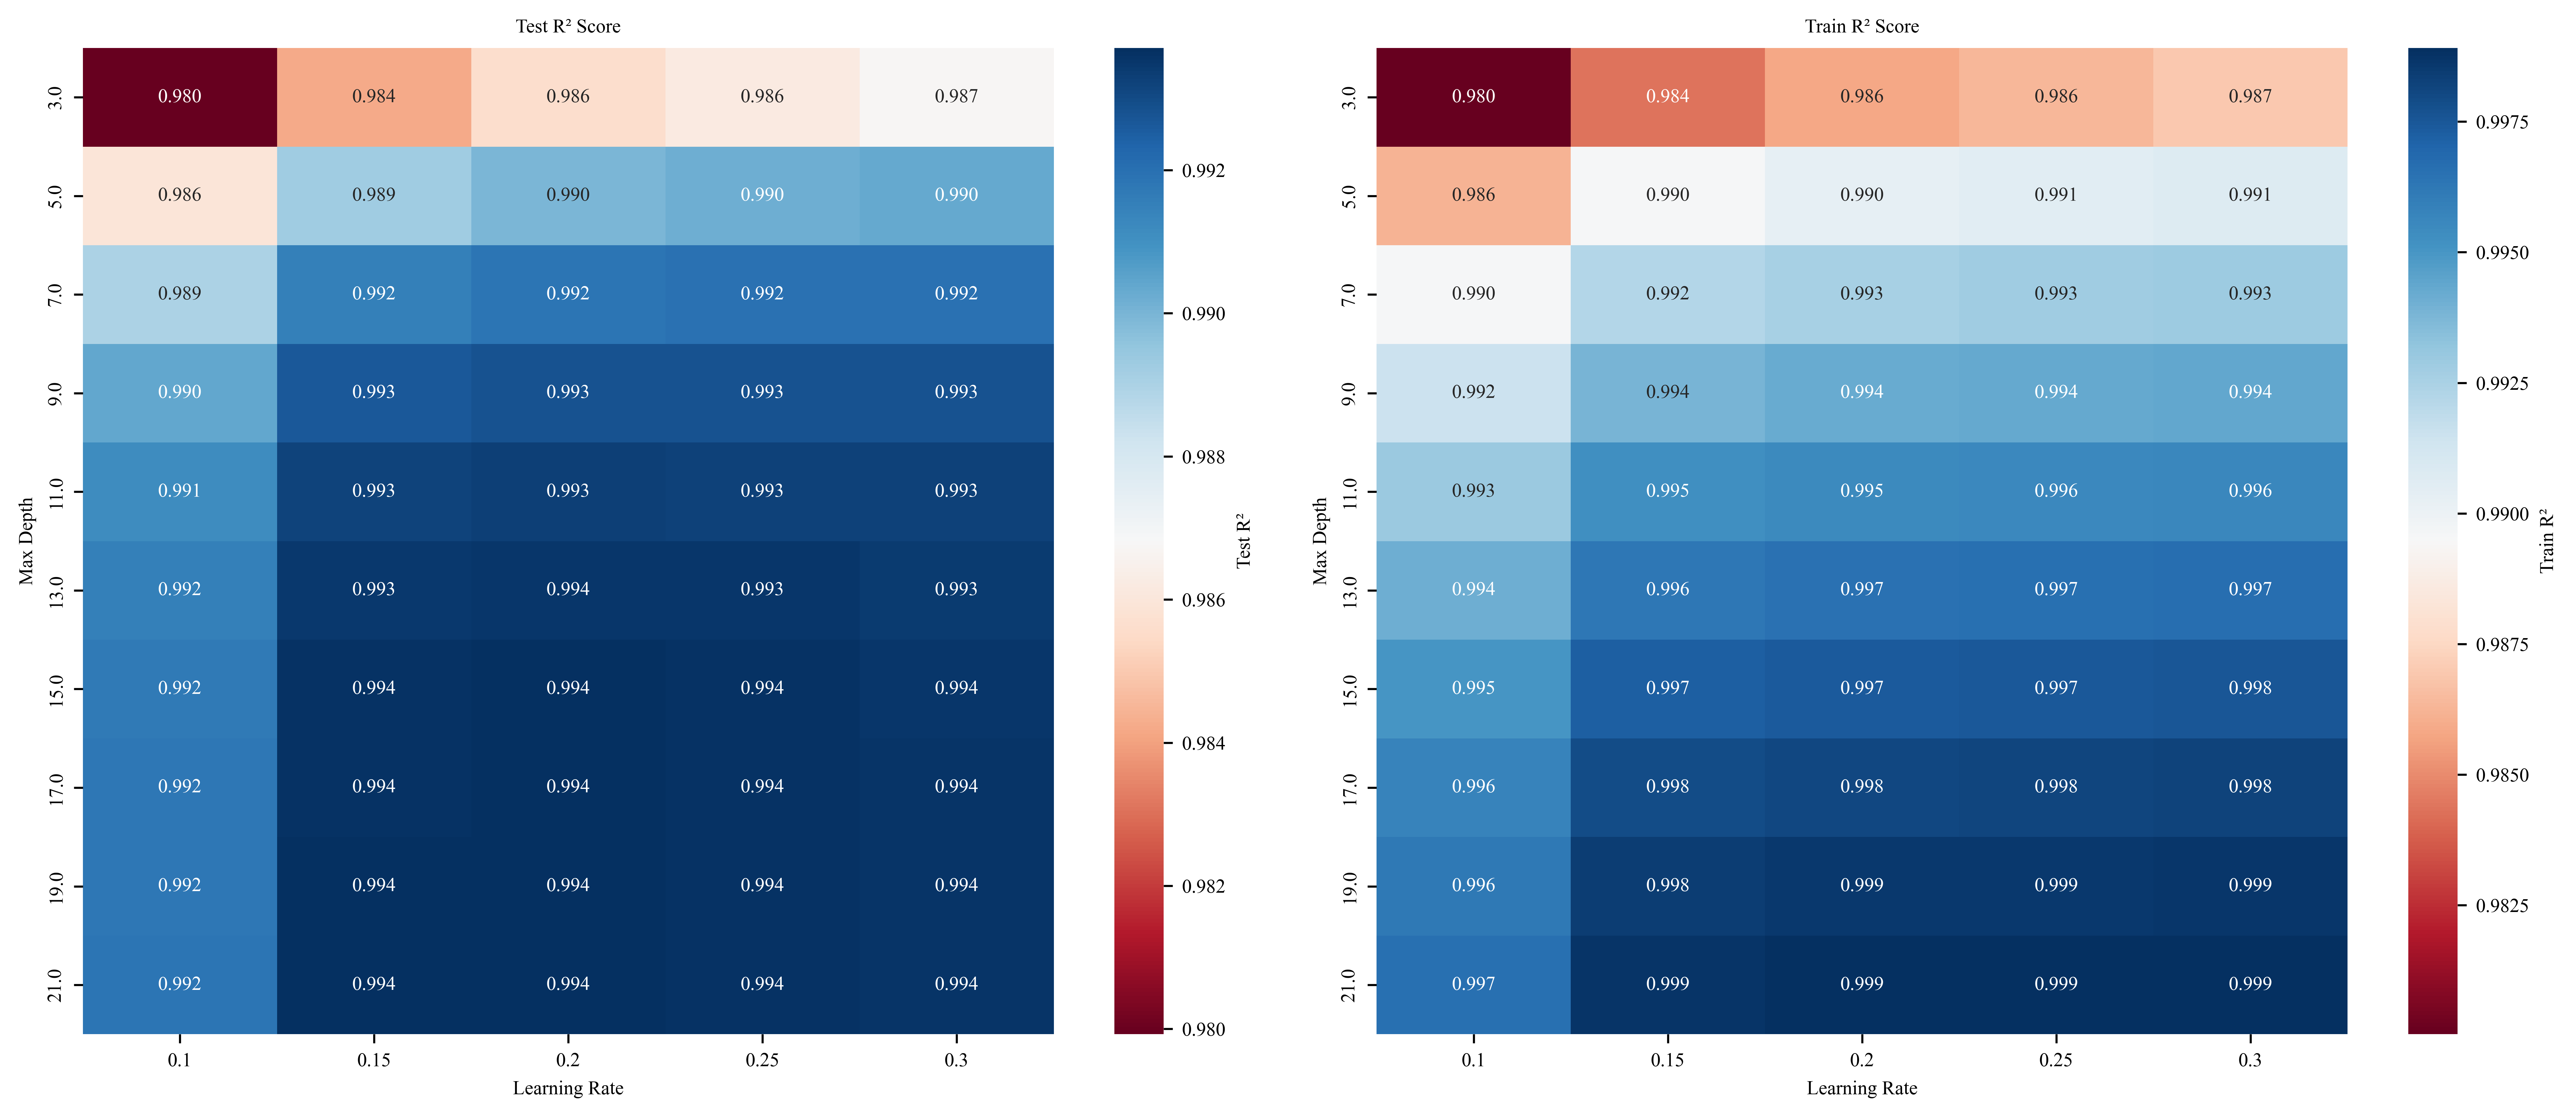

In [ ]:
df_gradient = df["Gradient Boosting" == df['Name']]
gb_pivot_test = df_gradient.pivot(index='max_depth', columns='learning_rate', values='CV Test R2')
gb_pivot_train = df_gradient.pivot(index='max_depth', columns='learning_rate', values='CV Train R2')

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 7.5  
plt.figure(figsize=(14, 6),dpi=600)

# Test R² Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(gb_pivot_test, annot=True, fmt=".3f", cmap="RdBu", cbar_kws={"label": "Test R²"})
plt.title("Test R² Score", fontsize=7.5)
plt.xlabel("Learning Rate")
plt.ylabel("Max Depth")

# Train R² Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(gb_pivot_train, annot=True, fmt=".3f", cmap="RdBu", cbar_kws={"label": "Train R²"})
plt.title("Train R² Score", fontsize=7.5)
plt.xlabel("Learning Rate")
plt.ylabel("Max Depth")

plt.tight_layout()
plt.show()


/var/folders/dv/3hwnztp553x_r0zsjwr72j4c0000gn/T/ipykernel_1426/1805190727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gradient["annot_text"] = df_gradient.apply(
/var/folders/dv/3hwnztp553x_r0zsjwr72j4c0000gn/T/ipykernel_1426/1805190727.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gradient["diff_r2"] = df_gradient["CV Train R2"].copy() - df_gradient["CV Test R2"].copy()


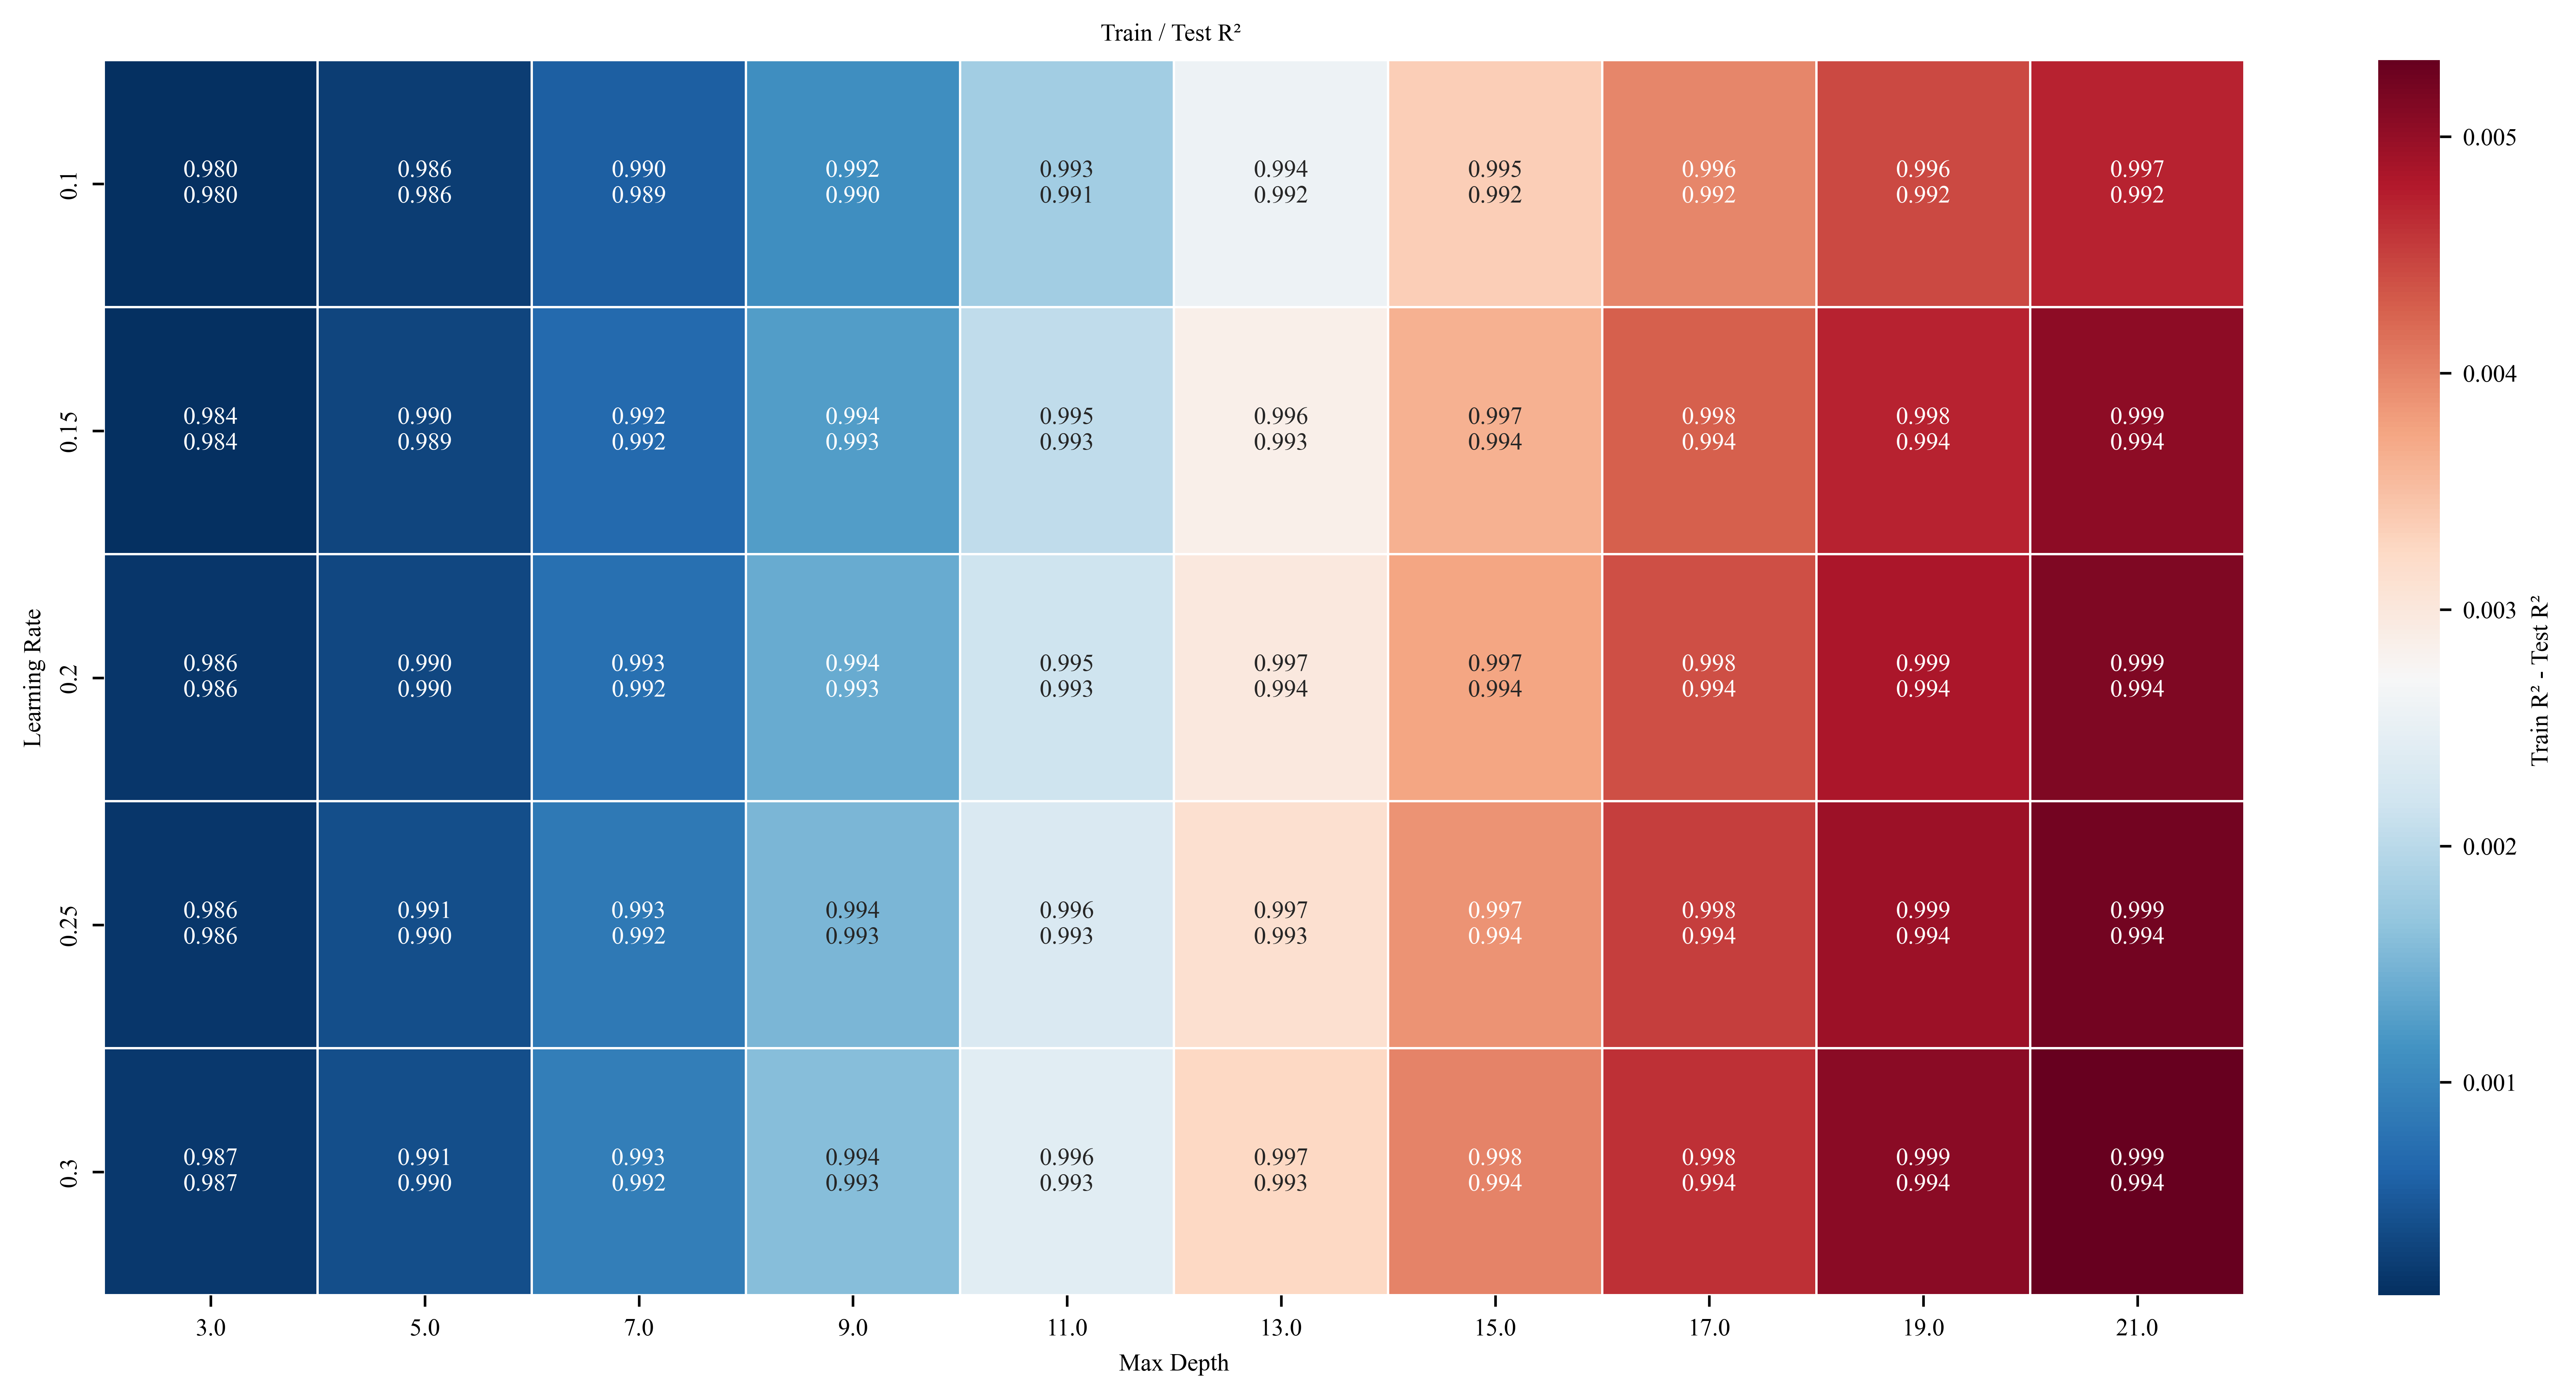

In [ ]:
df_gradient["annot_text"] = df_gradient.apply(
    lambda row: f"{row['CV Train R2']:.3f}\n{row['CV Test R2']:.3f}", axis=1
)

# Overfitting Heatmap
df_gradient["diff_r2"] = df_gradient["CV Train R2"] - df_gradient["CV Test R2"]

pivot_annot = df_gradient.pivot(index="learning_rate", columns="max_depth", values="annot_text")
pivot_diff = df_gradient.pivot(index="learning_rate", columns="max_depth", values="diff_r2")

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 7.5

plt.figure(figsize=(12, 6), dpi=600)
sns.heatmap(
    pivot_diff,
    annot=pivot_annot,
    fmt="",
    cmap="RdBu_r",
    cbar_kws={"label": "Train R² - Test R² "},
    linewidths=0.5
)

plt.title("Train / Test R² ", fontsize=7.5)
plt.ylabel("Learning Rate", fontsize=7.5)
plt.xlabel("Max Depth", fontsize=7.5)
plt.tight_layout()
plt.show()

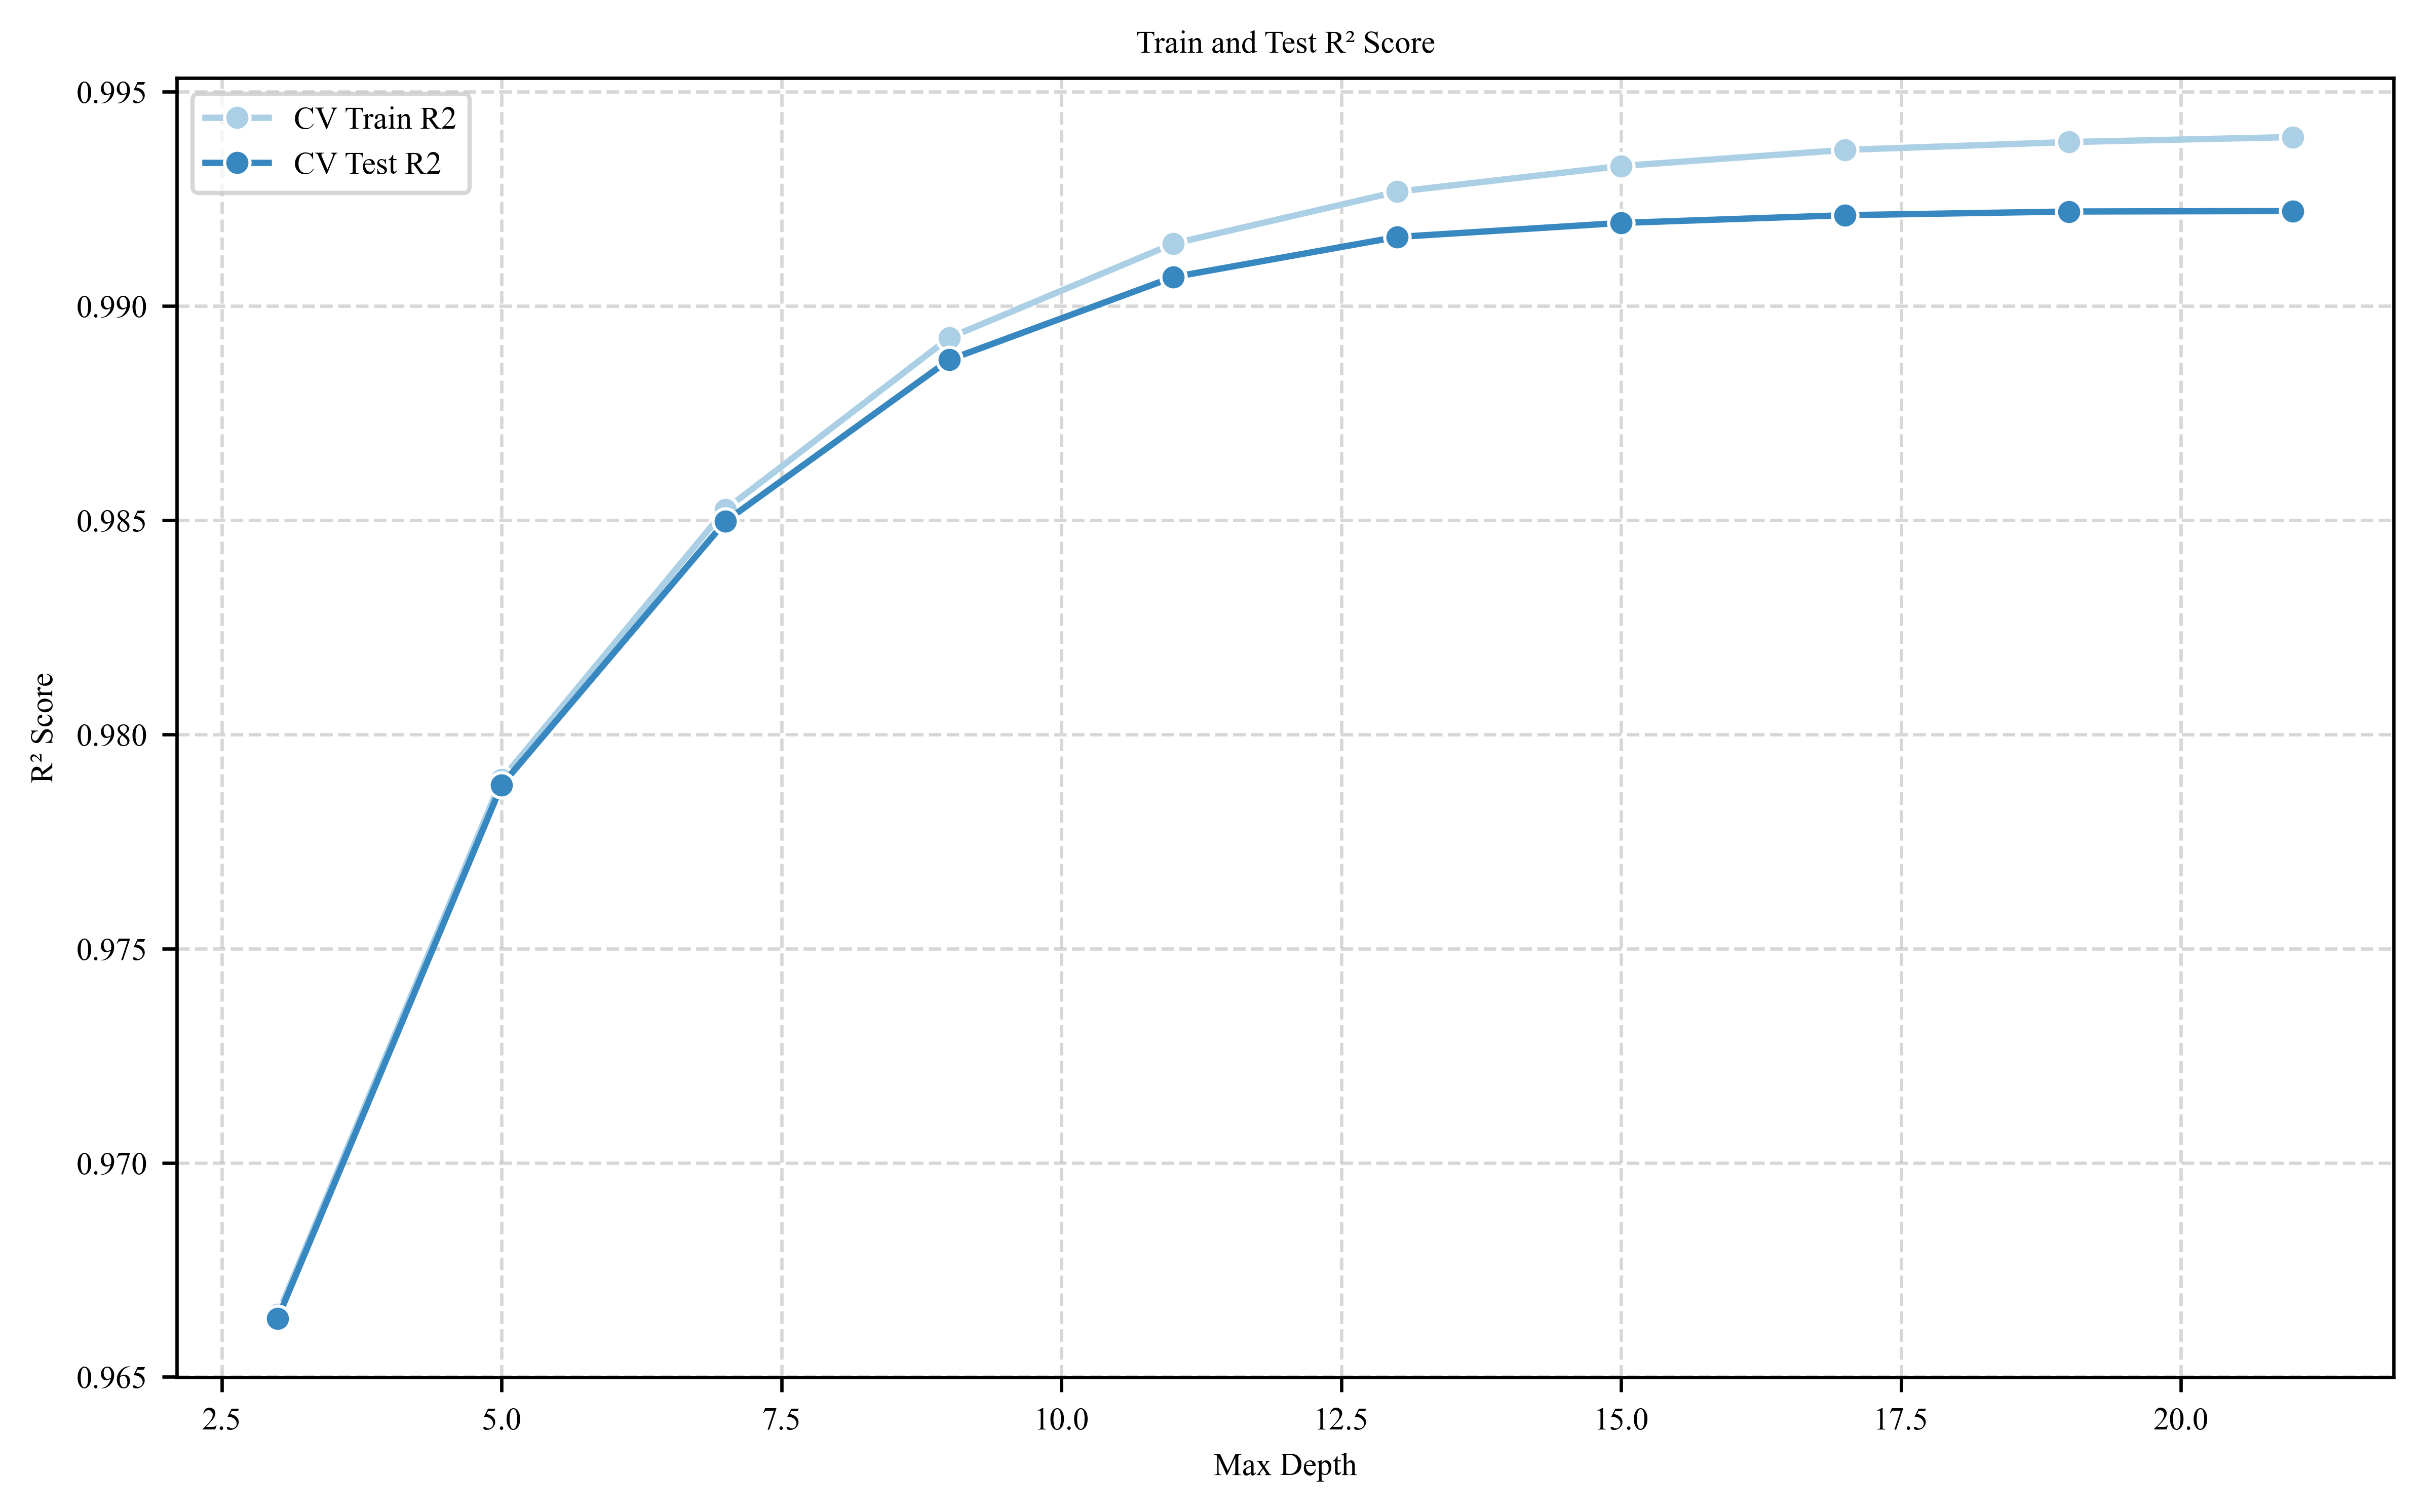

In [ ]:
df_ensemble = df["Ensemble (Bagged Trees)" == df['Name']].melt(id_vars="max_depth", value_vars=["CV Train R2", "CV Test R2"],
                    var_name="Set", value_name="R² Score")

# Lineplot
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 7.5 
plt.figure(figsize=(8, 5),dpi=600)
sns.lineplot(data=df_ensemble, x="max_depth", y="R² Score", hue="Set", marker="o", palette="Blues")

plt.title("Train and Test R² Score", fontsize=7.5)
plt.xlabel("Max Depth", fontsize=7.5)
plt.ylabel("R² Score", fontsize=7.5)
plt.grid(True, linestyle="--", alpha=0.5)

plt.legend(title="", fontsize=7.5)
plt.tight_layout()
plt.show()

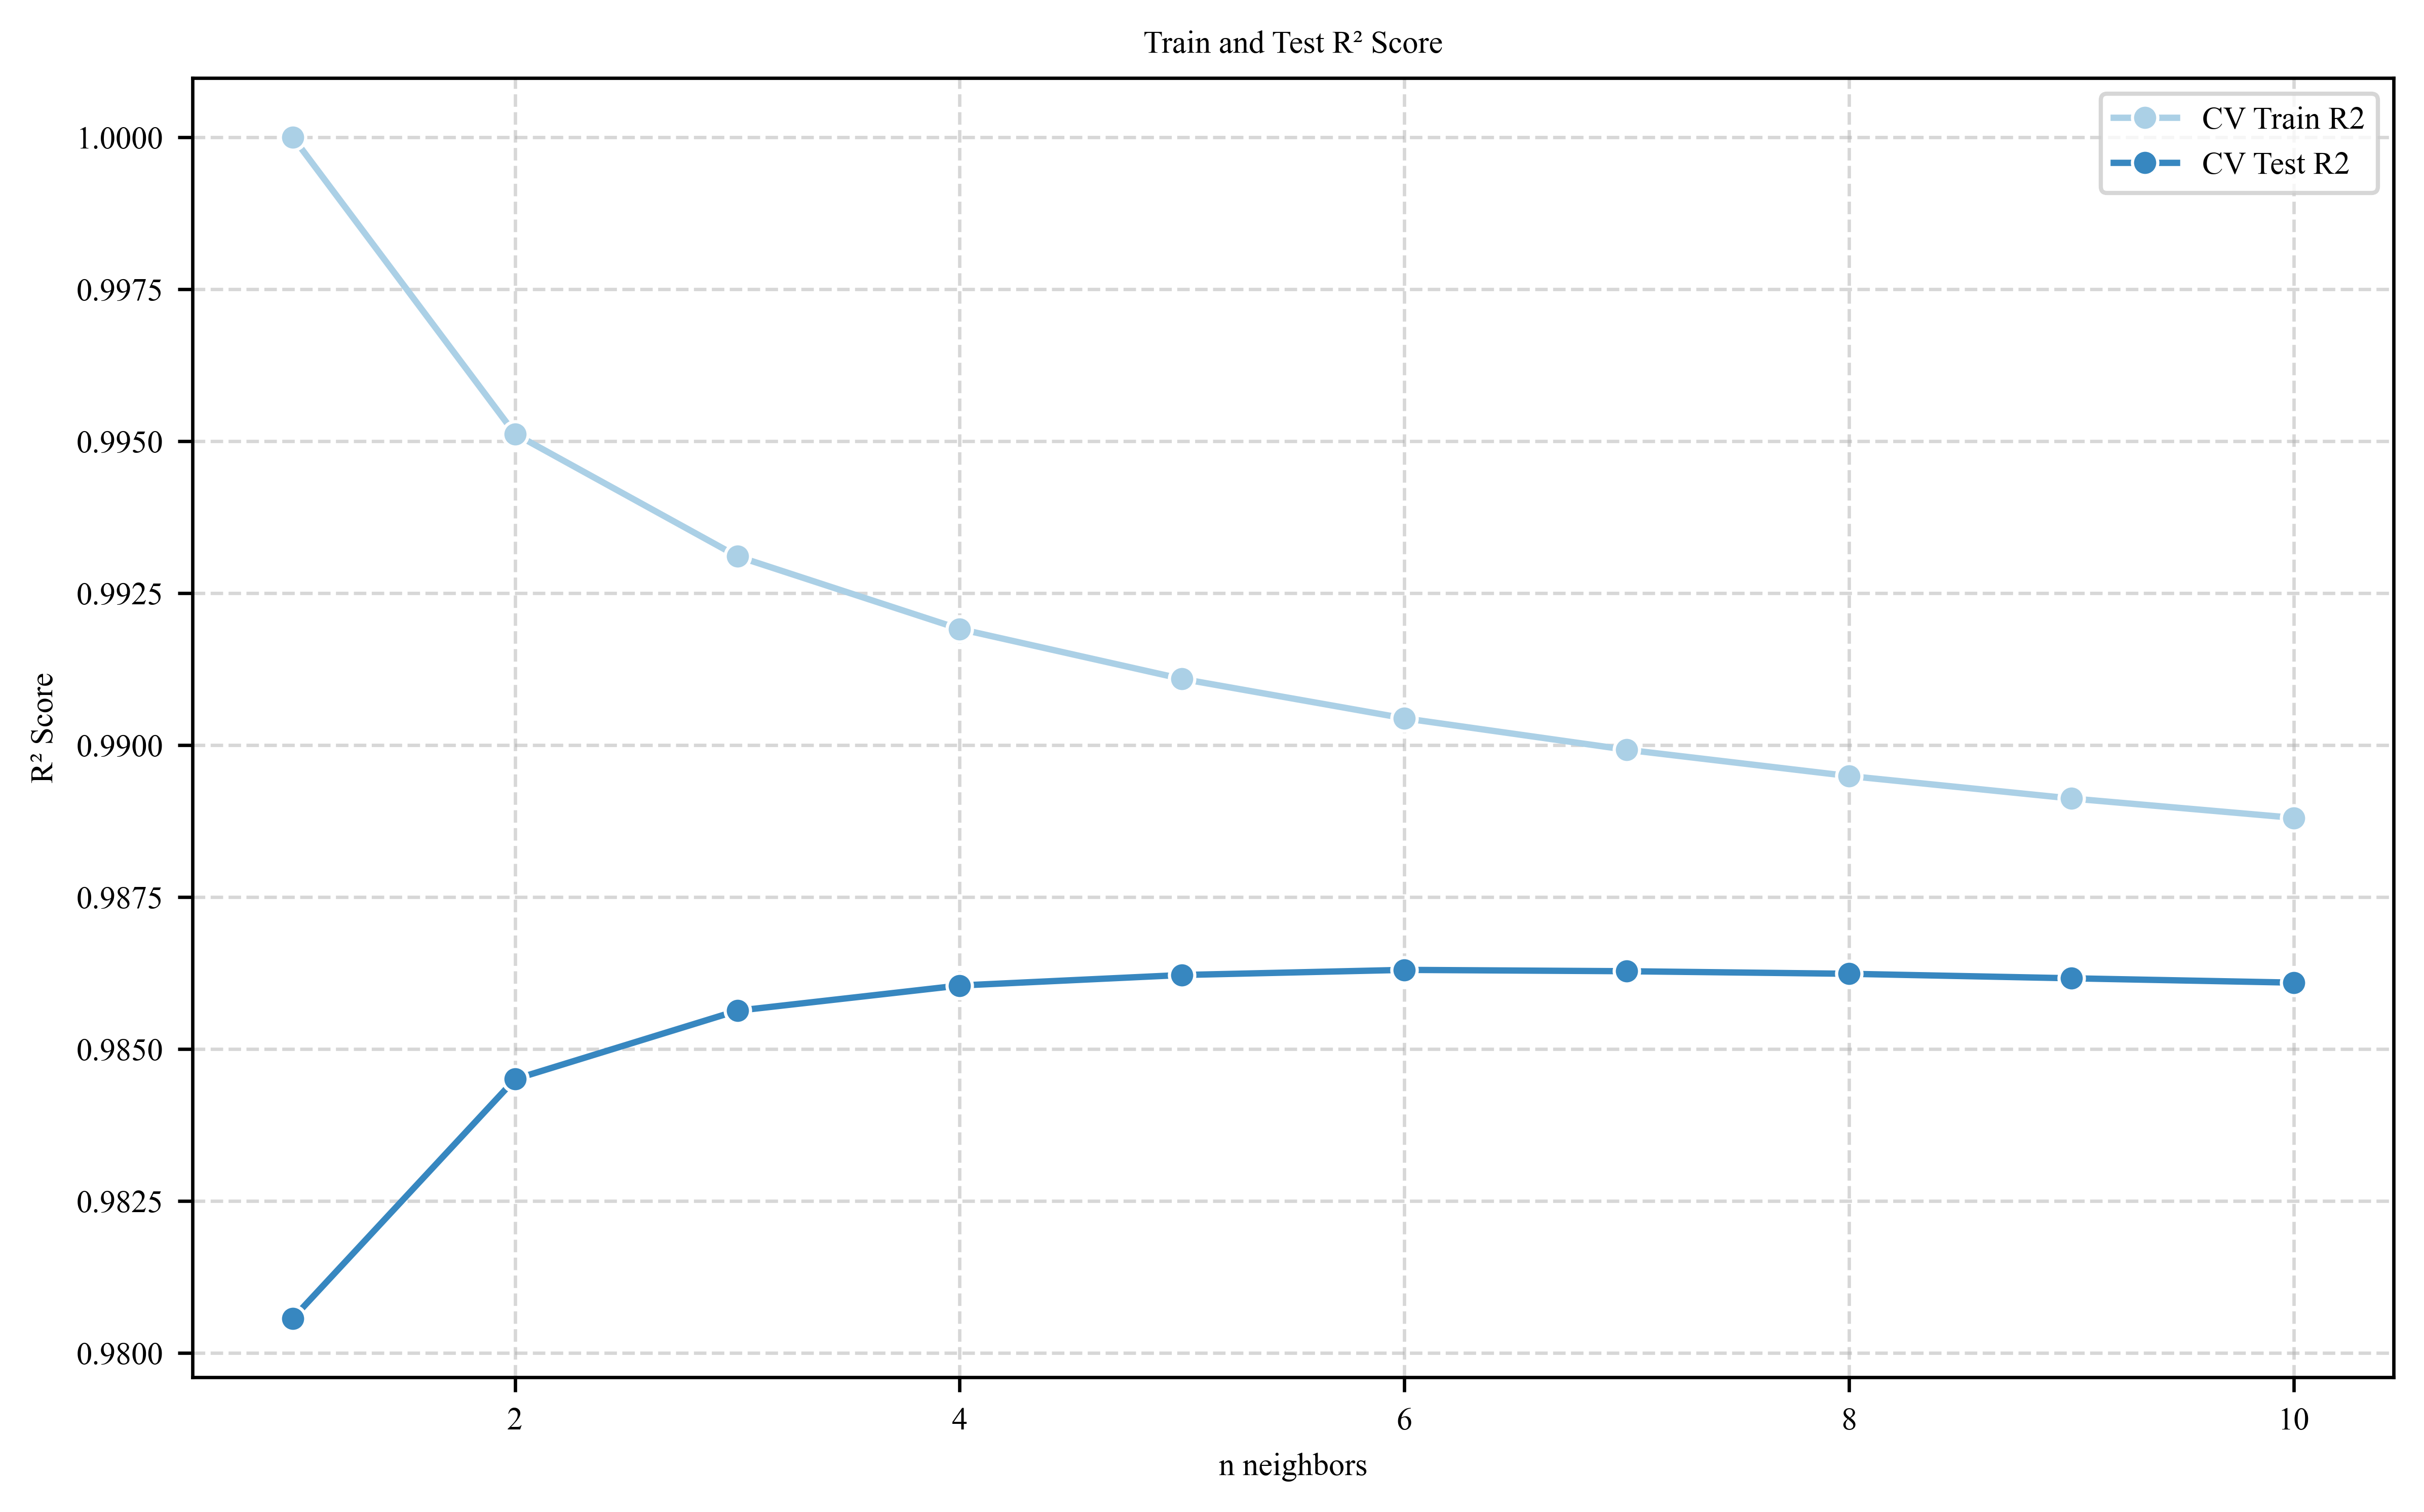

In [ ]:
df_knn = df["KNN" == df['Name']].melt(id_vars="n_neighbors", value_vars=["CV Train R2", "CV Test R2"],
                    var_name="Set", value_name="R² Score")

# Lineplot
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 7.5 
plt.figure(figsize=(8, 5),dpi=600)
sns.lineplot(data=df_knn, x="n_neighbors", y="R² Score", hue="Set", marker="o", palette="Blues")

plt.title("Train and Test R² Score", fontsize=7.5)
plt.xlabel("n neighbors", fontsize=7.5)
plt.ylabel("R² Score", fontsize=7.5)
plt.grid(True, linestyle="--", alpha=0.5)

plt.legend(title="", fontsize=7.5)
plt.tight_layout()
plt.show()

In [96]:
df_best = df.loc[df.groupby('Name')['CV Test R2'].idxmax()]
df_best.to_csv("../reports/best_runs.csv", index=False)
df_best_hyperparameters = df_best[["Name","learning_rate","max_depth","min_samples_leaf","n_estimators","n_neighbors"]].rename(columns={"Name": "Algorithm"})
df_best_hyperparameters = df_best_hyperparameters.set_index("Algorithm").T
df_best_hyperparameters.index.name = "Hyperparameters"
df_best_hyperparameters = df_best_hyperparameters.fillna("-")
df_best_hyperparameters

Algorithm,Ensemble (Bagged Trees),Gradient Boosting,KNN,Linear Regression,Neural Network,SVM
Hyperparameters,,,,,,
learning_rate,-,0.2,-,-,-,-
max_depth,21.0,19.0,-,-,-,-
min_samples_leaf,8.0,8.0,-,-,-,-
n_estimators,30.0,30.0,-,-,-,-
n_neighbors,-,-,6.0,-,-,-


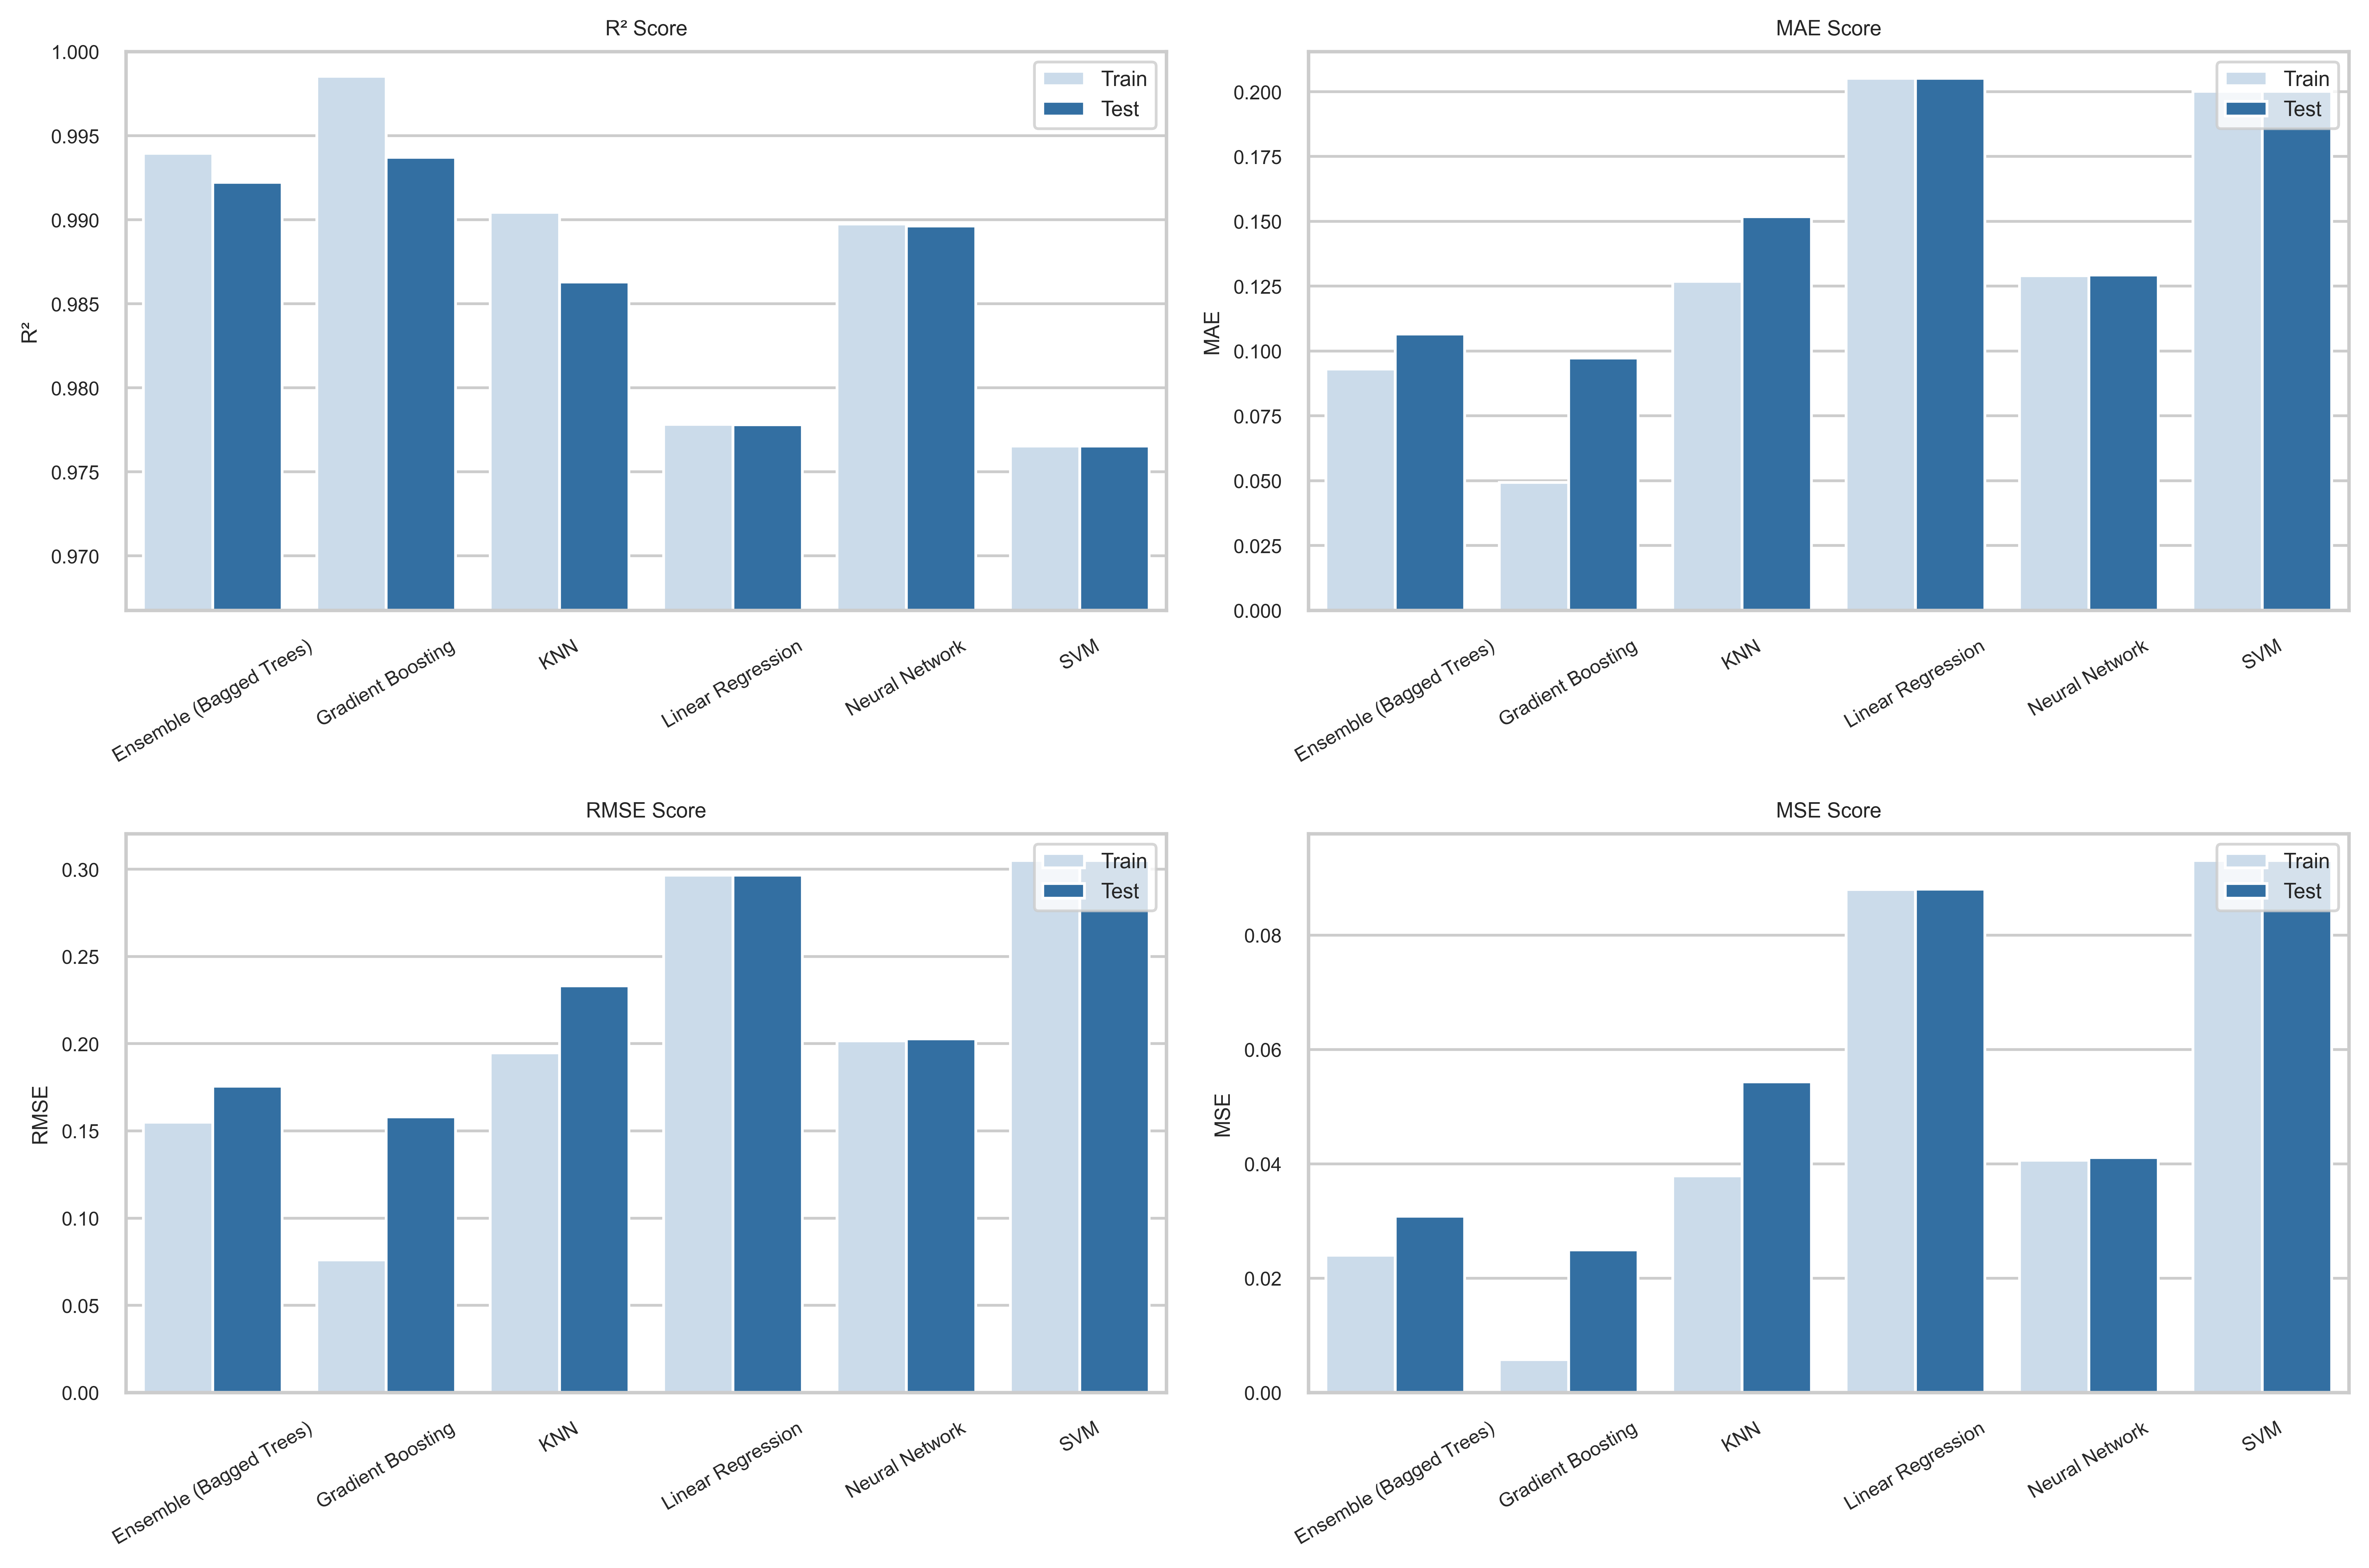

In [ ]:
metrics = ["R2", "MAE", "RMSE", "MSE"]

df_melted = pd.melt(
    df_best,
    id_vars=["Name"],
    value_vars=[f"CV Train {m}" for m in metrics] + [f"CV Test {m}" for m in metrics],
    var_name="Metric_Type", value_name="Score"
)

df_melted["Set"] = df_melted["Metric_Type"].apply(lambda x: "Train" if "Train" in x else "Test")
df_melted["Metric"] = df_melted["Metric_Type"].str.extract(r"(R2|MAE|RMSE|MSE)")
df_melted.rename(columns={"Name": "Algorithm"}, inplace=True)

palette_blues = sns.color_palette("Blues", n_colors=3)
color_dict = {"Train": palette_blues[0], "Test": palette_blues[-1]}

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 7.5 
fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi=600)
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    df_plot = df_melted[df_melted["Metric"] == metric]

    sns.barplot(
        data=df_plot,
        x="Algorithm", y="Score", hue="Set",
        palette=color_dict,
        ax=ax
    )
    ax.set_title(f"{metric} Score", fontsize=7.5)
    ax.set_ylabel(metric, fontsize=7.5)
    ax.set_xlabel("")
    ax.tick_params(labelsize=7)
    ax.legend(loc="upper right", fontsize=7.5)
    ax.tick_params(axis='x', rotation=30)

    min_val = df_plot["Score"].min()
    if metric == "R2":
        ax.set_title(f"R² Score", fontsize=7.5)
        ax.set_ylabel("R²", fontsize=7.5)
        ax.set_ylim(bottom=max(0, min_val * 0.99),top=1.0)
    else:
        ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()